## Exploratory Data Analysis (EDA) - Introducing lags

#### In this notebook we provide a statistical data analysis not solely based on raw data but on their 10 observations slot mentioned in the Challenge Description

In [1]:
import os

import sys

from pathlib import Path


parent = Path(os.path.abspath("")).resolve().parents[0]

if parent not in sys.path:
    sys.path.insert(0, str(parent))

In [2]:
import copy

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
import seaborn as sns
import colorcet as cc

import warnings
warnings.filterwarnings("ignore")

In [3]:
from ml.utils.data_utils import read_data, generate_time_lags

### We read the full dataset

In [4]:
df = read_data("../dataset/full_dataset.csv")

In [5]:
len(df.loc[df.District == "ElBorn"]), len(df.loc[df.District == "LesCorts"]), len(df.loc[df.District == "PobleSec"])

(4192, 6892, 15927)

In [6]:
df

,down,up,rnti_count,mcs_down,mcs_down_var,mcs_up,mcs_up_var,rb_down,rb_down_var,rb_up,rb_up_var,District
time,,,,,,,,,,,,
2018-03-28 15:56:00,174876896.0,1856888.0,10229.0,15.332298,87.157692,14.981497,49.989483,0.029681,4.497698e-08,0.000541,3.143298e-08,ElBorn
2018-03-28 15:58:00,209054176.0,2866200.0,12223.0,15.116846,87.192169,16.432613,62.494671,0.035971,4.615535e-08,0.000852,4.439640e-08,ElBorn
2018-03-28 16:00:00,191464640.0,1935360.0,11152.0,15.215739,87.227959,15.885238,63.087006,0.032750,4.646104e-08,0.000607,2.993595e-08,ElBorn
2018-03-28 16:02:00,241515680.0,2991152.0,14040.0,15.135400,86.199501,15.714660,77.187462,0.041372,4.532153e-08,0.000925,5.382563e-08,ElBorn
2018-03-28 16:04:00,264131088.0,3288816.0,15247.0,15.188944,86.151115,15.414080,69.118561,0.045074,4.655542e-08,0.001021,5.922178e-08,ElBorn
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-28 02:24:00,37187568.0,118080.0,2294.0,15.382020,87.171577,16.035715,13.321428,0.006199,4.440420e-08,0.000030,1.754167e-10,PobleSec
2018-02-28 02:26:00,33961656.0,69920.0,2155.0,14.984922,83.975639,18.900000,0.000000,0.005610,4.256897e-08,0.000023,0.000000e+00,PobleSec
2018-02-28 02:28:00,40714568.0,154816.0,2519.0,15.415878,84.750046,14.323529,16.558823,0.006675,4.471620e-08,0.000051,1.477500e-09,PobleSec


### We generate data points that include 10 observations to be used as our prediction materials

In [7]:
df_lags_X = generate_time_lags(df, 10)

In [8]:
df_lags_X.head()

,rb_up_var_lag-10,rb_up_lag-10,rb_down_var_lag-10,rb_down_lag-10,mcs_up_var_lag-10,mcs_up_lag-10,mcs_down_var_lag-10,mcs_down_lag-10,rnti_count_lag-10,up_lag-10,...,rb_down_var_lag-1,rb_down_lag-1,mcs_up_var_lag-1,mcs_up_lag-1,mcs_down_var_lag-1,mcs_down_lag-1,rnti_count_lag-1,up_lag-1,down_lag-1,District
time,,,,,,,,,,,,,,,,,,,,,
2018-03-28 16:16:00,3.143298e-08,0.000541,4.497698e-08,0.029681,49.989483,14.981497,87.157692,15.332298,10229.0,1856888.0,...,4.711435e-08,0.036078,56.133144,14.842332,86.958221,15.146159,12303.0,2193936.0,209997312.0,ElBorn
2018-03-28 16:18:00,4.439640e-08,0.000852,4.615535e-08,0.035971,62.494671,16.432613,87.192169,15.116846,12223.0,2866200.0,...,4.562575e-08,0.035865,58.438049,15.492438,86.273674,15.225310,12238.0,2551856.0,209190704.0,ElBorn
2018-03-28 16:20:00,2.993595e-08,0.000607,4.646104e-08,0.032750,63.087006,15.885238,87.227959,15.215739,11152.0,1935360.0,...,4.634120e-08,0.035230,58.172825,13.977254,87.437515,15.197440,12020.0,2012688.0,205107312.0,ElBorn
2018-03-28 16:22:00,5.382563e-08,0.000925,4.532153e-08,0.041372,77.187462,15.714660,86.199501,15.135400,14040.0,2991152.0,...,4.689734e-08,0.042154,75.962418,15.346758,88.413483,15.160942,14098.0,3320616.0,244770944.0,ElBorn
2018-03-28 16:24:00,5.922178e-08,0.001021,4.655542e-08,0.045074,69.118561,15.414080,86.151115,15.188944,15247.0,3288816.0,...,4.516392e-08,0.029265,64.505157,14.037872,86.916840,15.181100,10168.0,1748160.0,171757376.0,ElBorn


In [9]:
df_lags_y = generate_time_lags(df, 10, is_y=True)

In [10]:
df_lags_y.head()

,down,up,rnti_count,mcs_down,mcs_down_var,mcs_up,mcs_up_var,rb_down,rb_down_var,rb_up,rb_up_var,District
time,,,,,,,,,,,,
2018-03-28 16:16:00,209190704.0,2551856.0,12238.0,15.225310,86.273674,15.492438,58.438049,0.035865,4.562575e-08,0.000768,3.666732e-08,ElBorn
2018-03-28 16:18:00,205107312.0,2012688.0,12020.0,15.197440,87.437515,13.977254,58.172825,0.035230,4.634120e-08,0.000670,4.100988e-08,ElBorn
2018-03-28 16:20:00,244770944.0,3320616.0,14098.0,15.160942,88.413483,15.346758,75.962418,0.042154,4.689734e-08,0.001008,4.247607e-08,ElBorn
2018-03-28 16:22:00,171757376.0,1748160.0,10168.0,15.181100,86.916840,14.037872,64.505157,0.029265,4.516392e-08,0.000598,3.568987e-08,ElBorn
2018-03-28 16:24:00,235021312.0,2729104.0,13703.0,15.095089,87.506920,15.364646,60.214905,0.040206,4.523085e-08,0.000859,4.625785e-08,ElBorn


In [11]:
len(df_lags_X), len(df_lags_y)

(26981, 26981)

### Printing scatter plots for all the new generated time lags and exery base station.

In [12]:
def scatter_plot(df, x_axis, y_axis, district):
    fig, ax = plt.subplots(figsize=(10,6))
    ax.ticklabel_format(style='plain')

    sns.scatterplot(x=df[x_axis], y=df[y_axis])

    ax.set_title(district + ' '+ x_axis + ' per ' + y_axis, fontsize = 15, loc='center')
    ax.set_ylabel(y_axis, fontsize = 13)
    ax.set_xlabel(x_axis, fontsize = 13)
    plt.tick_params(axis='x', which='major', labelsize=12)
    plt.tick_params(axis='y', which='major', labelsize=10)
    ax.yaxis.tick_left() # where the y axis marks will be
    plt.yticks(rotation=30)
    plt.show()
    plt.close()

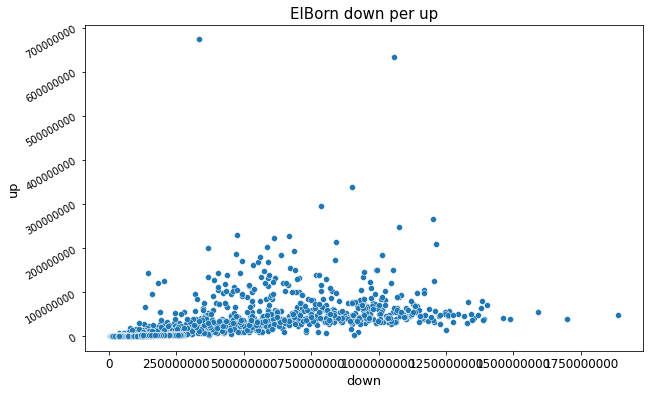

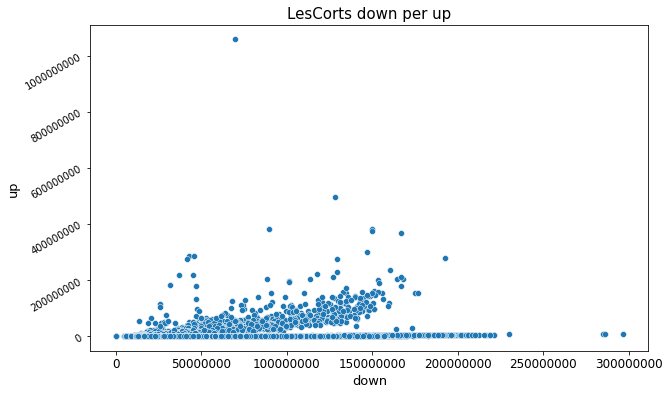

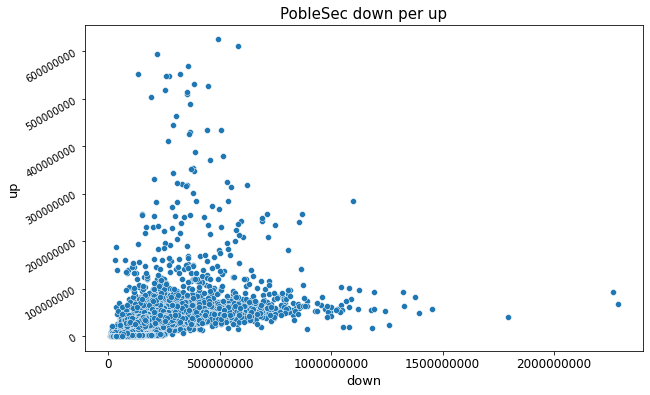

In [13]:
for district in df_lags_y.District.unique():
    tmp = df_lags_y.loc[df_lags_y.District == district]
    scatter_plot(tmp, "down", "up", district)

### Printing continuous time series for every base station

In [14]:
def sci_format(x,lim):
    return '{:.1e}'.format(x)

def distribution_plot(df, x_axis, district, bins=None):
    major_formatter = FuncFormatter(sci_format)
    fig, ax = plt.subplots(figsize=(10,6))
    
    sns.histplot(df[x_axis], kde=True, 
                 bins=bins, alpha=.4, edgecolor=(1, 1, 1, .4),
                 stat="count", kde_kws=dict(cut=3),
                )

    ax.set_xlabel("Uplink")
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    ax.yaxis.tick_left() 
    plt.tight_layout()
    plt.show()
    plt.close()

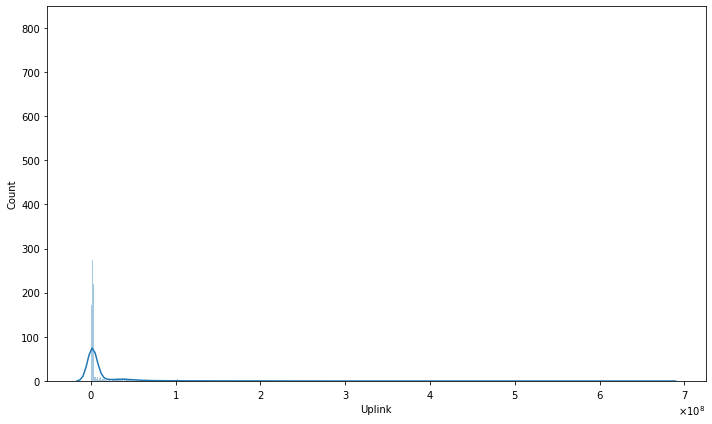

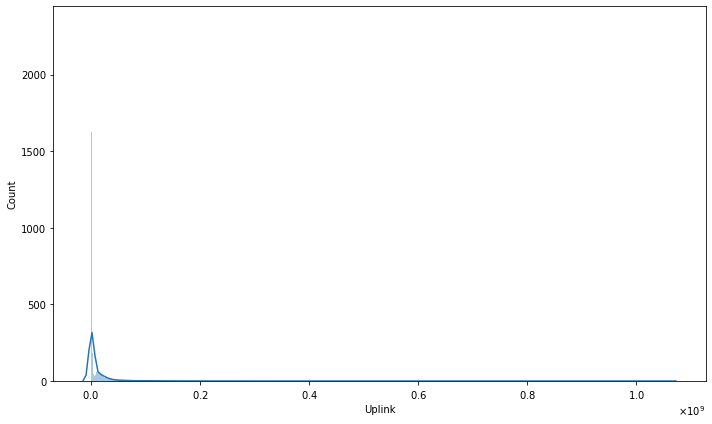

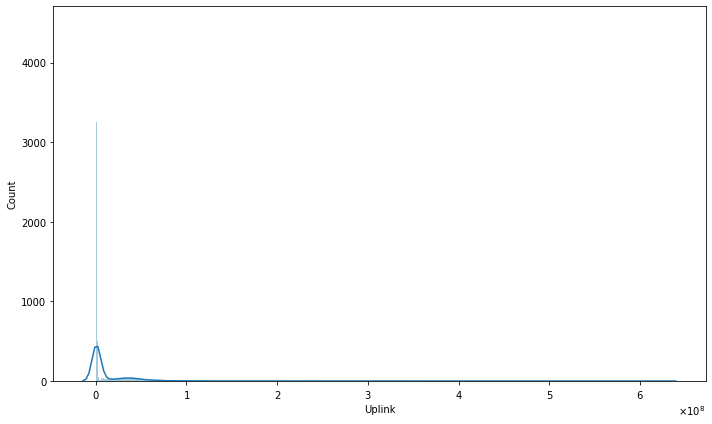

In [15]:
for district in df_lags_y.District.unique():
    tmp = df_lags_y.loc[df_lags_y.District == district]
    distribution_plot(tmp, "up", district=district, bins='auto')

### A closer look to every base station by cutting off some extreme outliers

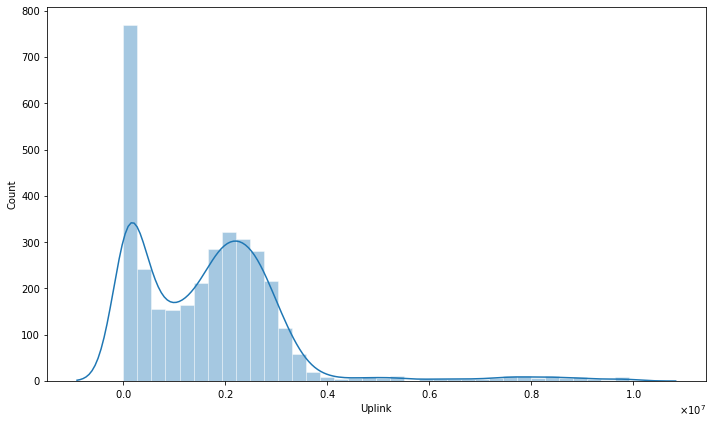

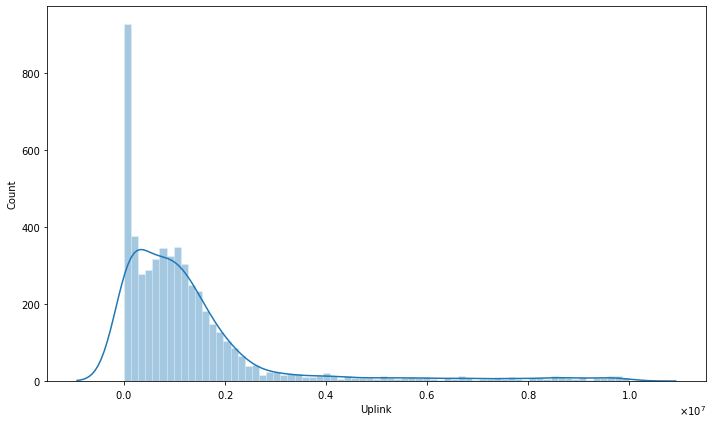

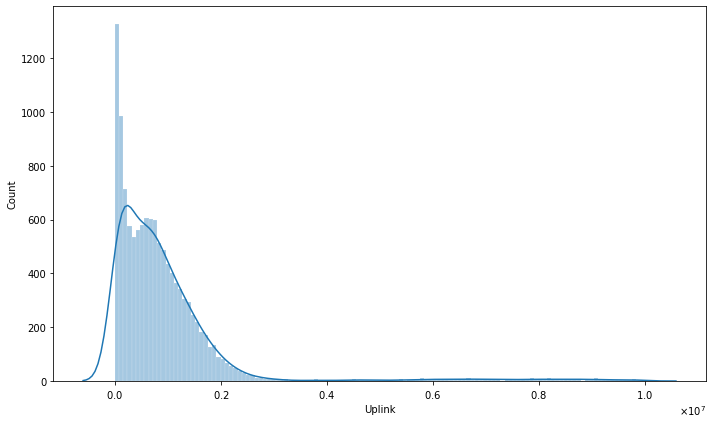

In [16]:
tmp_df = copy.deepcopy(df_lags_y)
tmp_df = tmp_df.loc[tmp_df.up <= 10000000]
for district in df_lags_y.District.unique():
    tmp = tmp_df.loc[tmp_df.District == district]
    distribution_plot(tmp, "up", district=district, bins='auto')

### Printing useful statistics about skewness, kurtosis for every base station dataset 

In [17]:
def get_stats(df, col, district):
    print(f"\tSkewness [{col}]: {df[col].skew()}")
    print(f"\tKurtosis: [{col}]: {df[col].kurt()}")
    print(f"\tMean: {df[col].mean()}, Median: {df[col].median()}, Mode: {df[col].mode().values[0]}")

In [18]:
for district in df_lags_y.District.unique():
    tmp = df_lags_y.loc[df_lags_y.District == district]
    print("Area:", district)
    get_stats(tmp, "up", district=district)
    get_stats(tmp, "down", district=district)
    print("\n")

Area: ElBorn
	Skewness [up]: 8.326245307922363
	Kurtosis: [up]: 132.0775909423828
	Mean: 10558638.0, Median: 2032372.0, Mode: 0.0
	Skewness [down]: 2.3513245582580566
	Kurtosis: [down]: 5.828850269317627
	Mean: 230499040.0, Median: 179385728.0, Mode: 184427232.0


Area: LesCorts
	Skewness [up]: 12.292612075805664
	Kurtosis: [up]: 321.1800842285156
	Mean: 9749587.0, Median: 1237928.0, Mode: 0.0
	Skewness [down]: 0.4803575873374939
	Kurtosis: [down]: -0.5704779028892517
	Mean: 76088096.0, Median: 68478856.0, Mode: 0.0


Area: PobleSec
	Skewness [up]: 8.033005714416504
	Kurtosis: [up]: 101.8520736694336
	Mean: 12136891.0, Median: 933440.0, Mode: 0.0
	Skewness [down]: 3.5666236877441406
	Kurtosis: [down]: 23.846277236938477
	Mean: 134151608.0, Median: 102707056.0, Mode: 95205104.0


